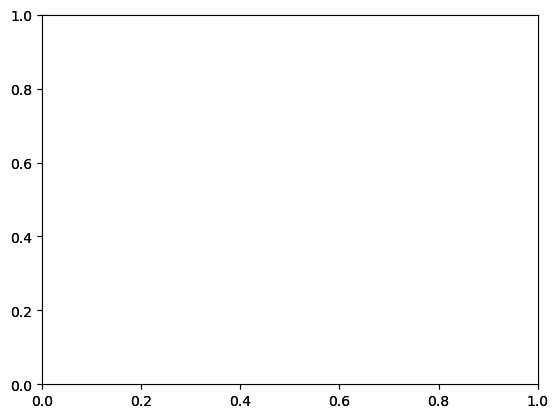

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from analyseClusters import getGraphOverlap
from input_output import *

In [2]:
results_name, results, target_name, target = choose_results_and_target()

Available datasets:
	Allosteric_Pyramid_Full_Fall22,
	restart_bad_trajs.sh,
	Allosteric_Pyramid_Partial_Fall22,
	AlloSolidCube_X5_4_12Dec22,
	AlloSolidCube_X5_1_12Dec22,
	AlloSolidCube_X3_Singlet_12Dec22,
	check_traj_sizes.sh,
	NoAlloPyramid_14Oct22,
	AlloPyramid_X4_14Mar23,
	jobinfo.txt,
	AlloSolidCube_X1_12Dec22


Enter simulation name:  AlloSolidCube_X1_12Dec22
Input the name of an analysis target (solidcube):  solidcube


In [3]:
results.print_status()

Name:                                                                                                                                                                                                                                    AlloSolidCube_X1_12Dec22
Rule:
Face   left             right             bottom               top        \
Attr. Color Align Cond. Color Align Cond.  Color Align Cond. Color Align   
R0      NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   
R1      NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   
R2      NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   
R3      NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   

Face         back             front              
Attr. Cond. Color Align Cond. Color Align Cond.  
R0      NaN   NaN   NaN   NaN   NaN   NaN   NaN  
R1      NaN   NaN   NaN   NaN   NaN   NaN   NaN  
R2      NaN   NaN   NaN   NaN   NaN   NaN   NaN  
R3      NaN   NaN   NaN   NaN

In [24]:
# nt = results.choose_narrow_type()
# datasets = list(filter(lambda x: x.narrow_type_number==nt, results.flat_runs()))
datasets = results.flat_runs()

In [40]:
only_subgraphs = input("Only count subgraphs of target?") == "True"
max_timepoints = min([dataset.num_timepoints() for dataset in datasets])
timepoint_subdiv = 10

Only count subgraphs of target? False


In [ ]:
datasets = filter(lambda x: x.narrow_type_number==nt, results.flat_runs())
df = pd.DataFrame(columns=["cluster_size", "temperature"])
for dataset in datasets:
    
    

In [42]:
df

,timepoint,cluster_size,temperature,nt
0,10,13,0.01,0
1,10,14,0.01,0
2,10,8,0.01,0
3,10,12,0.01,0
4,10,11,0.01,0
...,...,...,...,...
7,700,13,0.05,2
8,700,15,0.05,2
9,700,2,0.05,2
10,700,2,0.05,2


In [43]:
max_cluster_size = max(df['cluster_size'])

In [44]:
# constant narrow type - vary temperature

In [53]:
num_bins = 8
ymax=32
slider = alt.binding_range(min=0, max=max_timepoints, step=timepoint_subdiv)
select_timepoint = alt.selection_single(name="timepoint", fields=['timepoint'],
                                   bind=slider, init={'timepoint': 0})
alt.Chart(df).mark_area(opacity=0.3).encode(
    x=alt.X('cluster_size', sort=results.temperatures()) #, bin=alt.BinParams(maxbins=num_bins, extent=[0, max_cluster_size])),
    y=alt.Y('count()', scale=alt.Scale(0, ymax)),
    color=alt.Color('temperature:O', scale=alt.Scale(scheme="accent"), title="Temperature"),
    row="nt",
)#.add_selection(select_timepoint).transform_filter(select_timepoint)


alt.Chart(...)